# Credit Card Fraud Detection: Data Understanding & Exploratory Data Analysis

## Project Overview
This notebook is the first step in building a machine learning pipeline for credit card fraud detection. We will perform comprehensive exploratory data analysis (EDA) on the highly imbalanced Kaggle Credit Card Fraud Detection dataset.

## Problem Statement
**Objective:** Develop a binary classification model to detect fraudulent credit card transactions in an imbalanced dataset where frauds represent <1% of all transactions.

**Challenge:** Class imbalance requires careful treatment during preprocessing and evaluation.

## Notebook Objectives
1. Load and explore the dataset structure
2. Understand data types, missing values, and basic statistics
3. Visualize class distribution and identify imbalance
4. Analyze feature distributions
5. Perform correlation analysis
6. Document findings and insights for next steps

In [1]:
"""
IMPORT REQUIRED LIBRARIES
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print('✓ Libraries imported successfully')
print(f'  - Pandas version: {pd.__version__}')
print(f'  - NumPy version: {np.__version__}')
print(f'  - Matplotlib & Seaborn configured')

✓ Libraries imported successfully
  - Pandas version: 2.2.3
  - NumPy version: 2.1.3
  - Matplotlib & Seaborn configured


## Section 1: Data Loading and Initial Exploration

Load the creditcard.csv dataset and examine its structure, dimensions, and data types.

In [2]:
# Define data path
data_path = Path('../data/raw/creditcard.csv')

# Load the dataset
df = pd.read_csv(data_path)

print('Dataset loaded successfully')
print(f'\nDataset Shape: {df.shape}')
print(f'  - Rows (Transactions): {df.shape[0]:,}')
print(f'  - Columns (Features): {df.shape[1]}')

Dataset loaded successfully

Dataset Shape: (284807, 31)
  - Rows (Transactions): 284,807
  - Columns (Features): 31


### Data Info and Structure

In [3]:
# Display data types and missing values
print('Data Types:')
print(df.dtypes)
print(f'\nMissing Values:')
print(df.isnull().sum())
print(f'\nTotal missing values: {df.isnull().sum().sum()} (Good - no missing data!)')

Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Total missing

In [4]:
# Display first few rows
print('First 5 rows of the dataset:')
print(df.head())

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

### Statistical Summary

In [ ]:
# Statistical summary
print('Statistical Summary of Features:')
print(df.describe().T)

# Additional statistics
print('\n' + '='*70)
print('Feature Details:')
print('='*70)
print(f'\nV1-V28: PCA-transformed features (already scaled)')
print(f'Time: Seconds elapsed between transactions in the dataset')
print(f'Amount: Transaction amount in currency units')
print(f'Class: Target variable (0=Normal, 1=Fraud)')

## Section 2: Class Imbalance Analysis

This is the most critical aspect of this dataset. Fraud cases are extremely rare, creating a severe class imbalance that will impact model training and evaluation.

In [5]:
# Class distribution
class_counts = df['Class'].value_counts().sort_index()
class_percentages = df['Class'].value_counts(normalize=True).sort_index() * 100

print('='*70)
print('CLASS DISTRIBUTION')
print('='*70)
print(f'\nClass 0 (Normal Transactions):   {class_counts[0]:>7,} ({class_percentages[0]:>6.2f}%)')
print(f'Class 1 (Fraudulent Transactions): {class_counts[1]:>5,} ({class_percentages[1]:>6.2f}%)')
print(f'\nImbalance Ratio (Fraud/Normal):  1:{class_counts[0]/class_counts[1]:.0f}')
print('='*70)

# This is the key insight
print('\n⚠️ IMPORTANT: Severe Class Imbalance Detected!')
print('   - Less than 0.2% of transactions are fraudulent')
print('   - Naive accuracy baseline: ~99.83% (if predicting all as normal)')
print('   - Must use appropriate metrics: Precision, Recall, F1-Score, ROC-AUC')

CLASS DISTRIBUTION

Class 0 (Normal Transactions):   284,315 ( 99.83%)
Class 1 (Fraudulent Transactions):   492 (  0.17%)

Imbalance Ratio (Fraud/Normal):  1:578

⚠️ IMPORTANT: Severe Class Imbalance Detected!
   - Less than 0.2% of transactions are fraudulent
   - Naive accuracy baseline: ~99.83% (if predicting all as normal)
   - Must use appropriate metrics: Precision, Recall, F1-Score, ROC-AUC


### Visualization of Class Imbalance

✓ Figure saved: 01_class_distribution.png


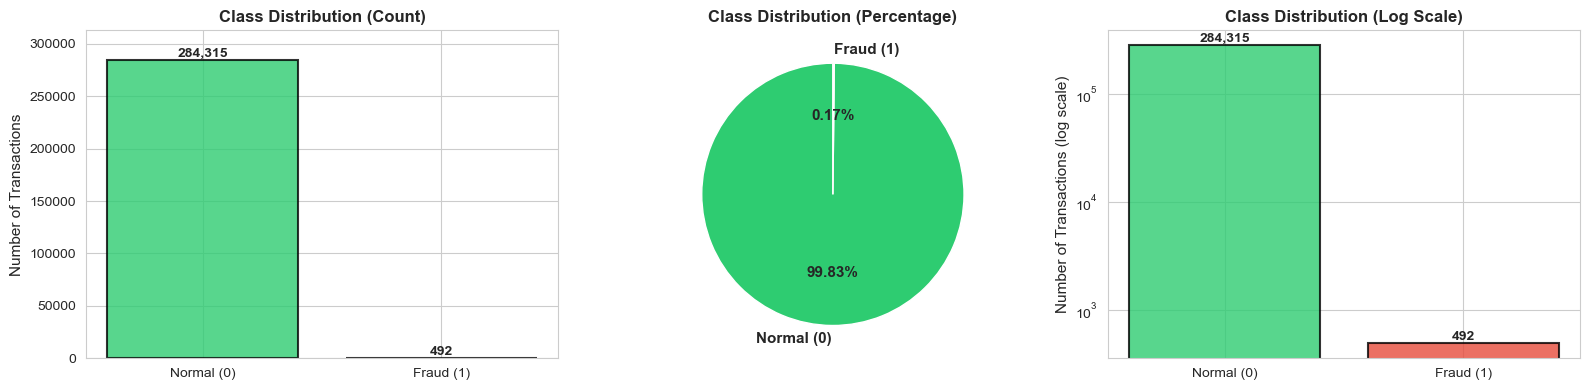

In [6]:
# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# 1. Count plot
class_labels = ['Normal (0)', 'Fraud (1)']
colors = ['#2ecc71', '#e74c3c']  # Green for normal, red for fraud

axes[0].bar(class_labels, class_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_title('Class Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Transactions', fontsize=11)
axes[0].set_ylim([0, class_counts[0] * 1.1])

# Add count labels on bars
for i, (label, count) in enumerate(zip(class_labels, class_counts.values)):
    axes[0].text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')

# 2. Pie chart
axes[1].pie(class_counts.values, labels=class_labels, autopct='%1.2f%%',
           colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=12, fontweight='bold')

# 3. Log scale to visualize imbalance better
axes[2].bar(class_labels, class_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[2].set_title('Class Distribution (Log Scale)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Number of Transactions (log scale)', fontsize=11)
axes[2].set_yscale('log')

# Add count labels
for i, (label, count) in enumerate(zip(class_labels, class_counts.values)):
    axes[2].text(i, count, f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/01_class_distribution.png', dpi=300, bbox_inches='tight')
print('✓ Figure saved: 01_class_distribution.png')
plt.show()

In [7]:
# Separate data by class for comparison
normal_transactions = df[df['Class'] == 0]
fraud_transactions = df[df['Class'] == 1]

print(f'\nNormal Transactions: {len(normal_transactions):,}')
print(f'Fraudulent Transactions: {len(fraud_transactions):,}')


Normal Transactions: 284,315
Fraudulent Transactions: 492


## Section 3: Feature Distribution Analysis

Analyze the distribution of key features (Amount and Time) to understand transaction patterns.

✓ Figure saved: 02_amount_distribution.png


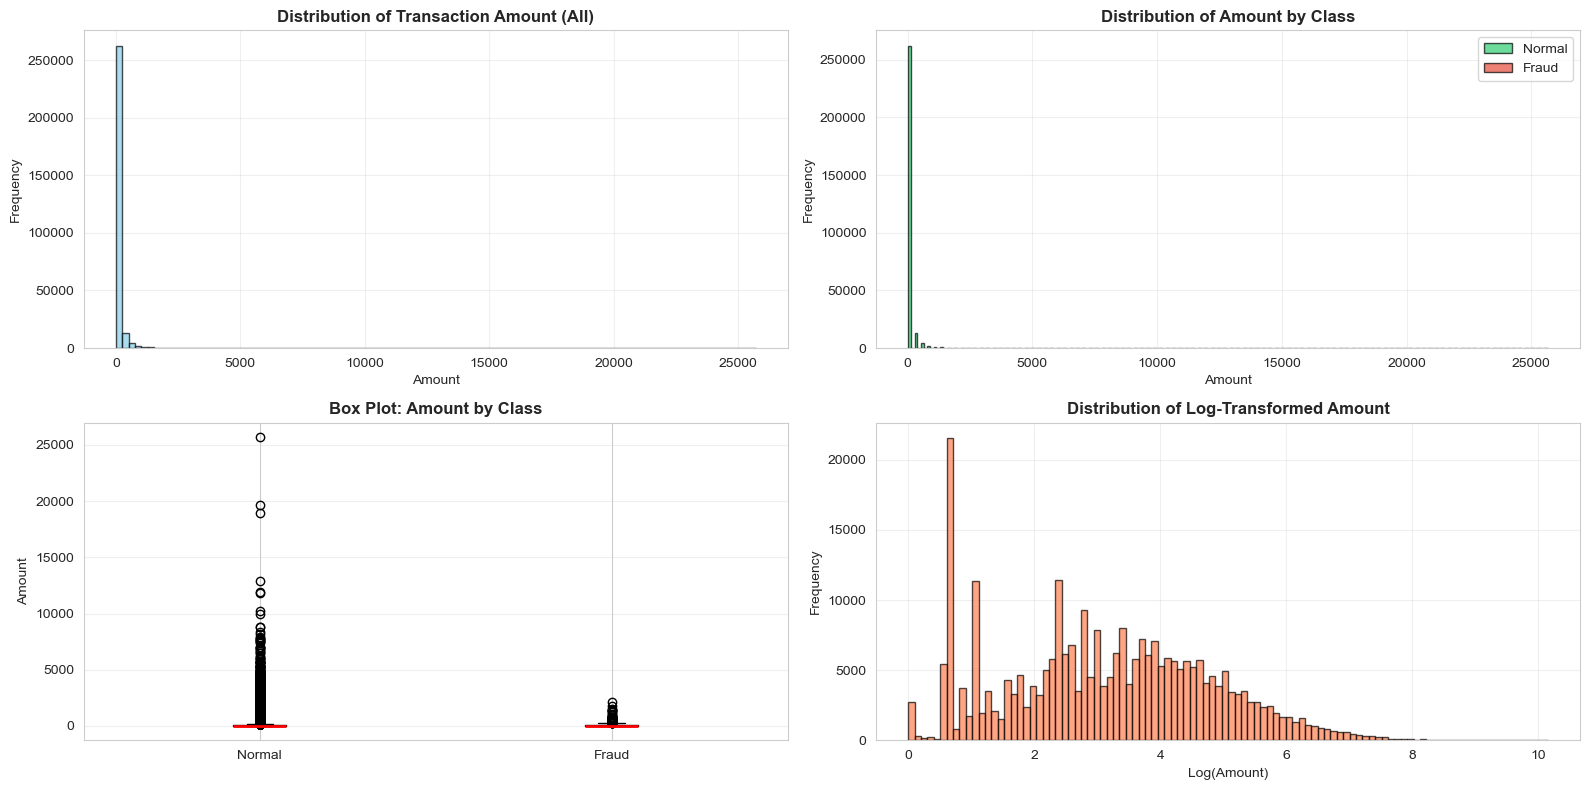


Amount Statistics:

Normal Transactions:
  Mean: $88.29
  Median: $22.00
  Std Dev: $250.11
  Range: $0.00 - $25691.16

Fraudulent Transactions:
  Mean: $122.21
  Median: $9.25
  Std Dev: $256.68
  Range: $0.00 - $2125.87


In [8]:
# Amount feature analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

# Row 1: Amount distribution
axes[0, 0].hist(df['Amount'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Transaction Amount (All)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

# Amount by class
axes[0, 1].hist([normal_transactions['Amount'], fraud_transactions['Amount']], 
               label=['Normal', 'Fraud'], color=['#2ecc71', '#e74c3c'], 
               bins=100, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Amount by Class', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Amount')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Row 2: Box plots
axes[1, 0].boxplot([normal_transactions['Amount'], fraud_transactions['Amount']], 
                   labels=['Normal', 'Fraud'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightblue', color='black'),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_title('Box Plot: Amount by Class', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Amount')
axes[1, 0].grid(alpha=0.3, axis='y')

# Log-scale distribution
axes[1, 1].hist(np.log1p(df['Amount']), bins=100, color='coral', edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution of Log-Transformed Amount', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Log(Amount)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/02_amount_distribution.png', dpi=300, bbox_inches='tight')
print('✓ Figure saved: 02_amount_distribution.png')
plt.show()

# Statistics
print('\nAmount Statistics:')
print(f'\nNormal Transactions:')
print(f'  Mean: ${normal_transactions["Amount"].mean():.2f}')
print(f'  Median: ${normal_transactions["Amount"].median():.2f}')
print(f'  Std Dev: ${normal_transactions["Amount"].std():.2f}')
print(f'  Range: ${normal_transactions["Amount"].min():.2f} - ${normal_transactions["Amount"].max():.2f}')

print(f'\nFraudulent Transactions:')
print(f'  Mean: ${fraud_transactions["Amount"].mean():.2f}')
print(f'  Median: ${fraud_transactions["Amount"].median():.2f}')
print(f'  Std Dev: ${fraud_transactions["Amount"].std():.2f}')
print(f'  Range: ${fraud_transactions["Amount"].min():.2f} - ${fraud_transactions["Amount"].max():.2f}')

### Time Feature Analysis

✓ Figure saved: 03_time_distribution.png


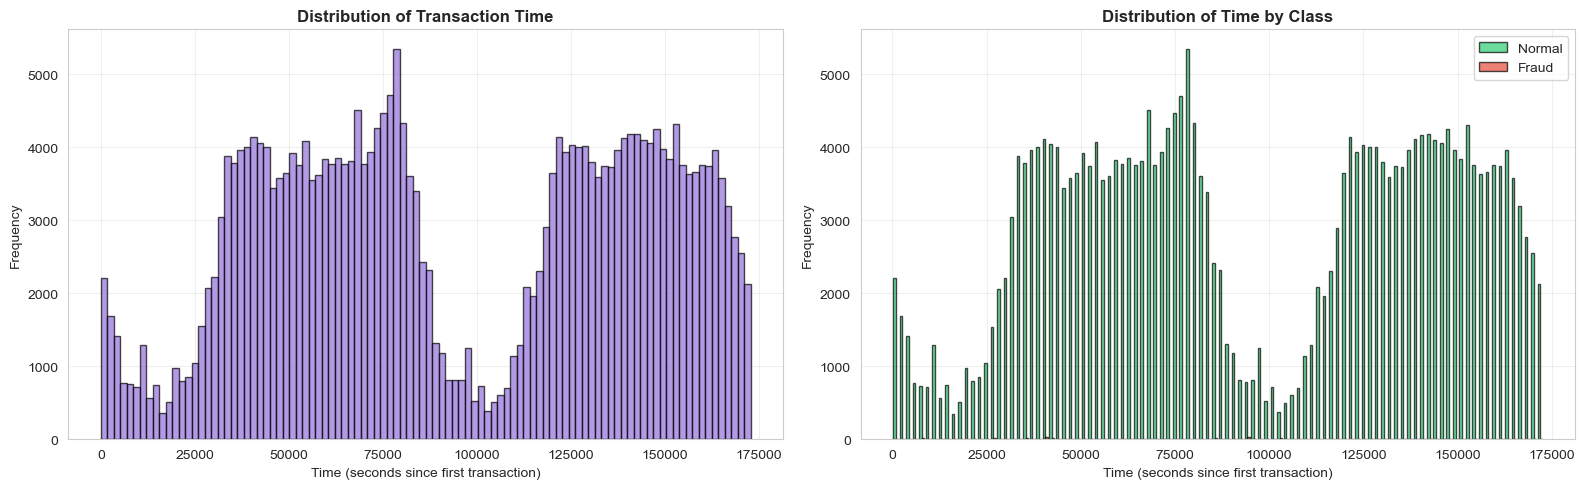


Time Statistics:
Time range: 0 to 172792 seconds
Duration: 2.0 days


In [9]:
# Time feature analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Time distribution
axes[0].hist(df['Time'], bins=100, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Transaction Time', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Time (seconds since first transaction)')
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Time by class
axes[1].hist([normal_transactions['Time'], fraud_transactions['Time']], 
            label=['Normal', 'Fraud'], color=['#2ecc71', '#e74c3c'],
            bins=100, alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Time by Class', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Time (seconds since first transaction)')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/03_time_distribution.png', dpi=300, bbox_inches='tight')
print('✓ Figure saved: 03_time_distribution.png')
plt.show()

print('\nTime Statistics:')
print(f'Time range: {df["Time"].min():.0f} to {df["Time"].max():.0f} seconds')
print(f'Duration: {df["Time"].max() / 86400:.1f} days')

In [10]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Correlation with target (Class)
target_correlation = correlation_matrix['Class'].sort_values(ascending=False)

print('='*70)
print('TOP 10 FEATURES CORRELATED WITH FRAUD')
print('='*70)
print(target_correlation.head(11))  # Include Class itself

print('\n' + '='*70)
print('TOP 10 FEATURES NEGATIVELY CORRELATED WITH FRAUD')
print('='*70)
print(target_correlation.tail(10))

TOP 10 FEATURES CORRELATED WITH FRAUD
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

TOP 10 FEATURES NEGATIVELY CORRELATED WITH FRAUD
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


✓ Figure saved: 04_correlation_matrix_full.png


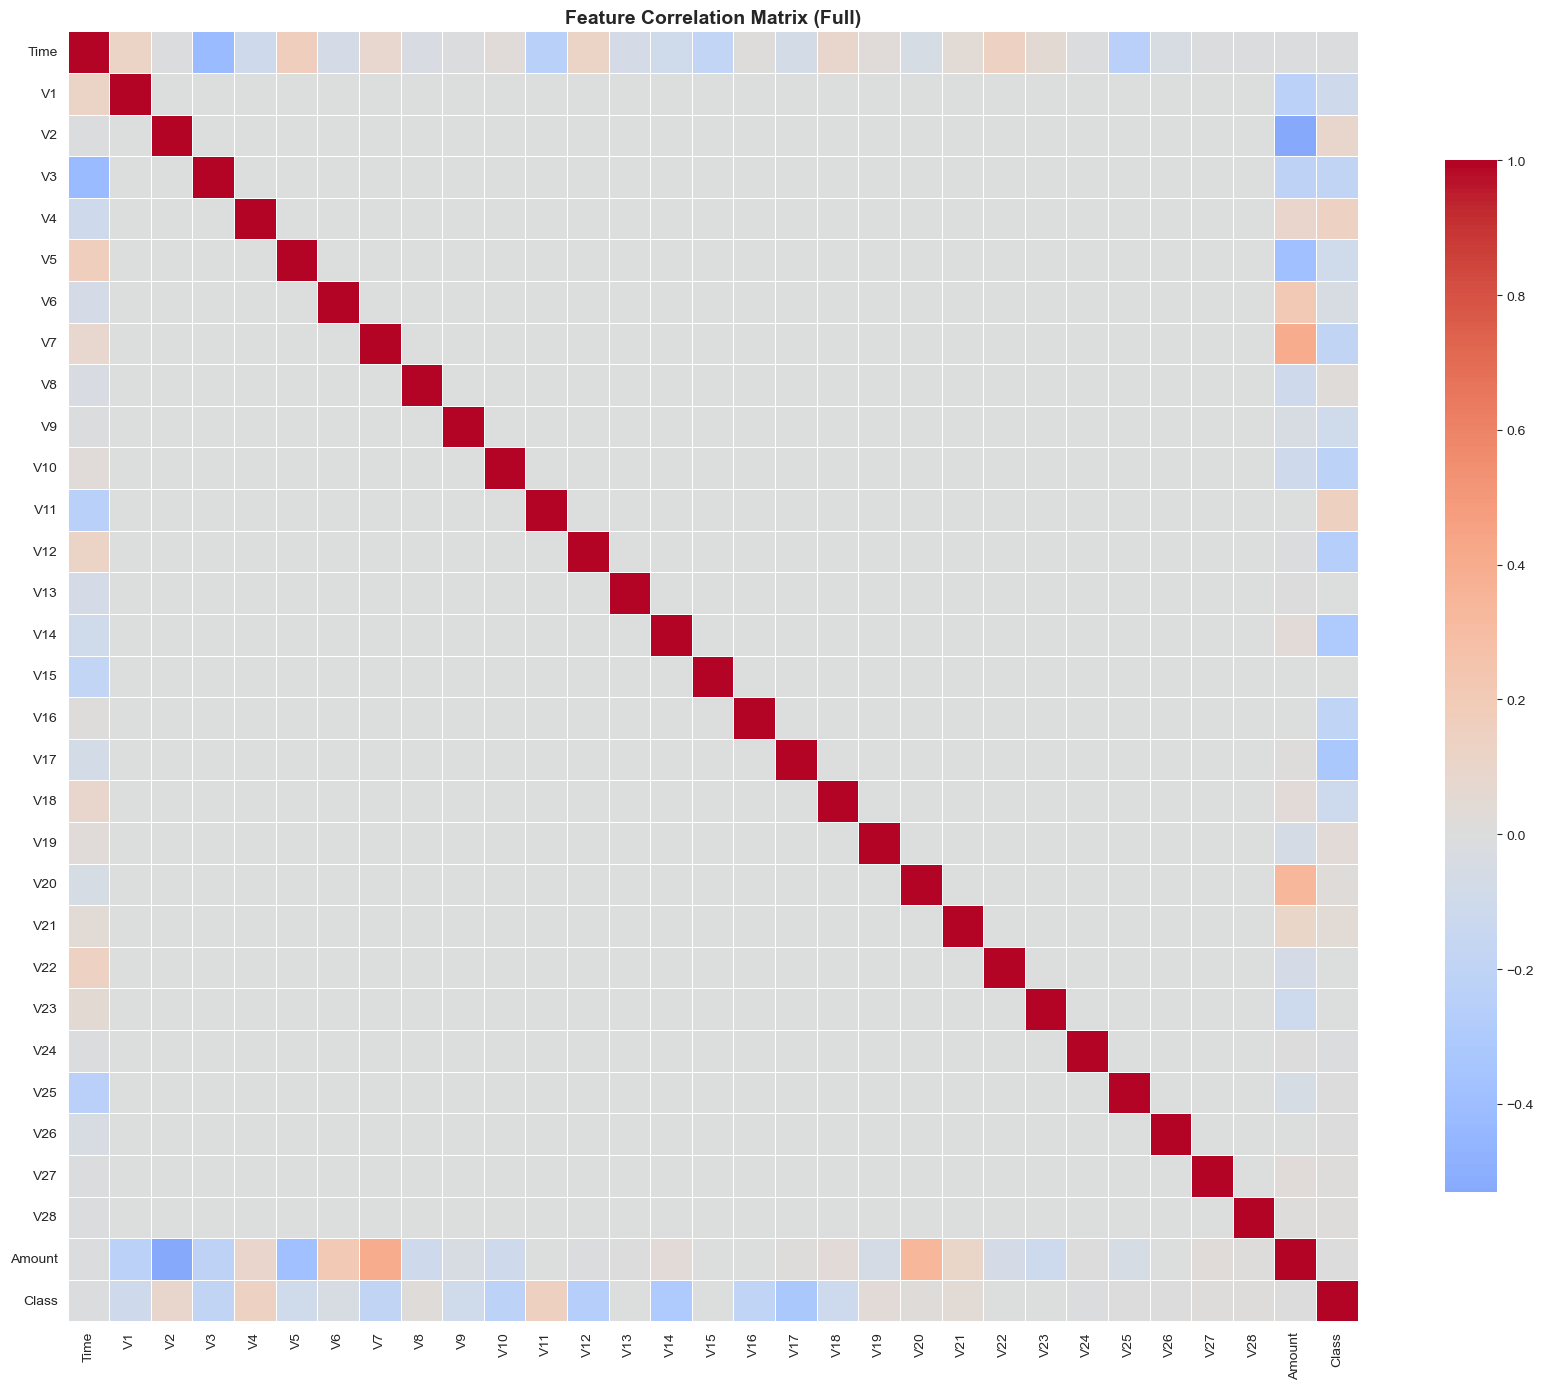

✓ Figure saved: 05_feature_correlation_with_target.png


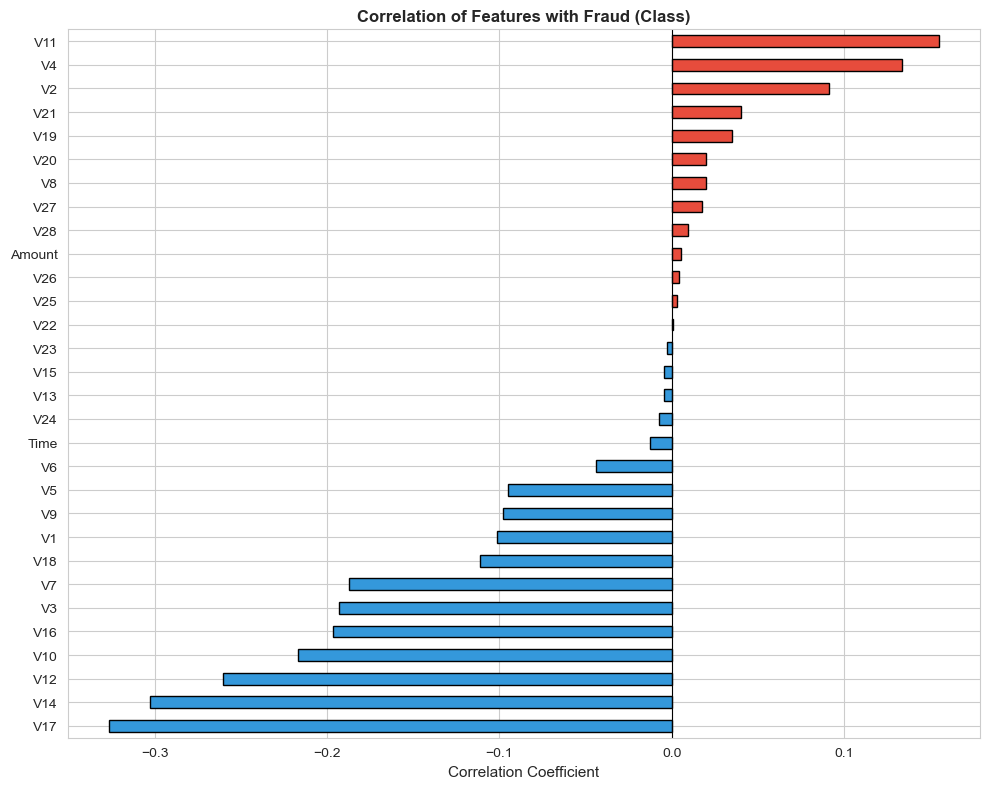

In [11]:
# Create correlation heatmap
plt.figure(figsize=(18, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0,
           square=True, linewidths=0.5, cbar_kws={'shrink': 0.8},
           annot=False)  # Too dense for annotations with all features
plt.title('Feature Correlation Matrix (Full)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/04_correlation_matrix_full.png', dpi=300, bbox_inches='tight')
print('✓ Figure saved: 04_correlation_matrix_full.png')
plt.show()

# Focused correlation with target
fig, ax = plt.subplots(figsize=(10, 8))
top_corr = target_correlation.drop('Class').sort_values()
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_corr.values]
top_corr.plot(kind='barh', color=colors, ax=ax, edgecolor='black')
ax.set_title('Correlation of Features with Fraud (Class)', fontsize=12, fontweight='bold')
ax.set_xlabel('Correlation Coefficient', fontsize=11)
ax.axvline(x=0, color='black', linewidth=0.8)
plt.tight_layout()
plt.savefig('../results/figures/05_feature_correlation_with_target.png', dpi=300, bbox_inches='tight')
print('✓ Figure saved: 05_feature_correlation_with_target.png')
plt.show()

## Section 5: Pairwise Relationships

Analyze how fraudulent and normal transactions differ across key dimensions.

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

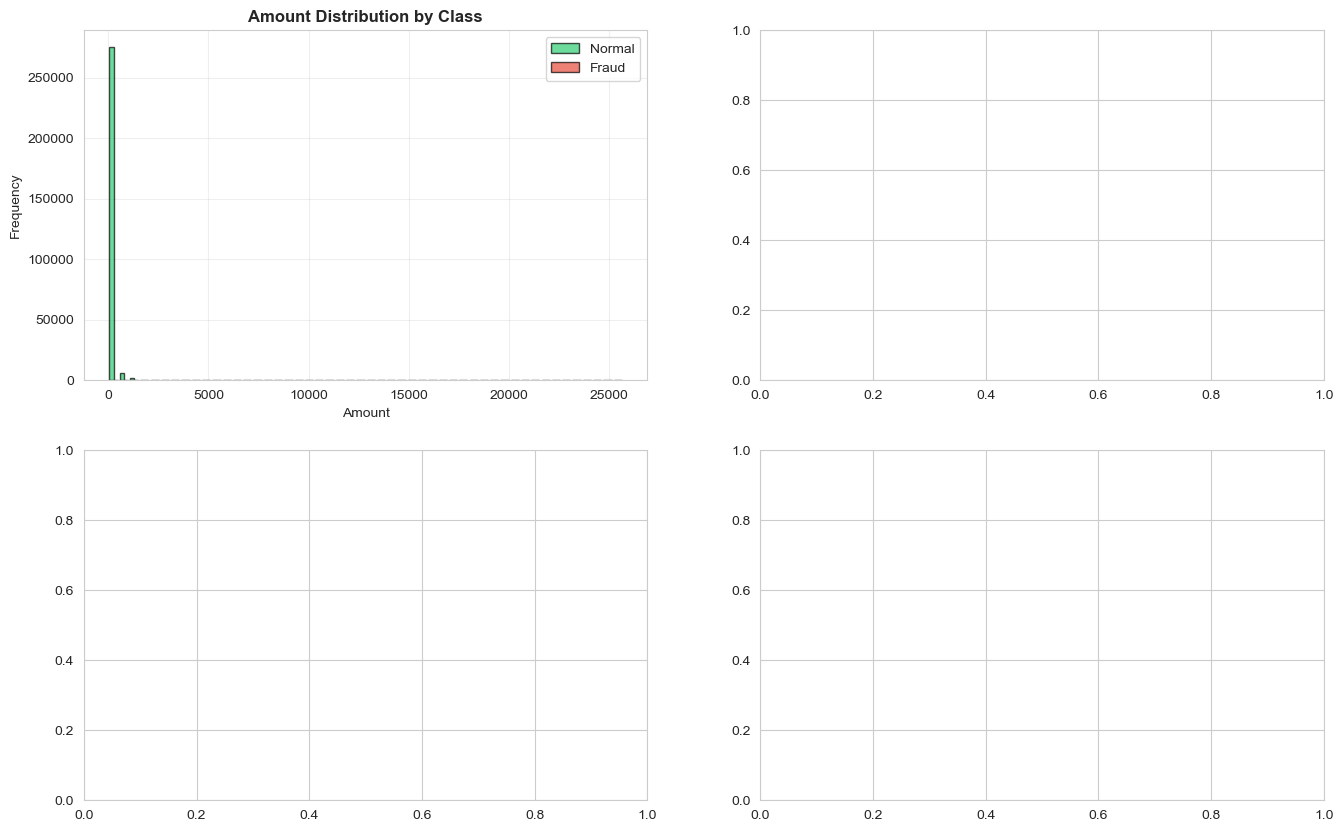

In [12]:
# Detailed comparison of fraud vs normal
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Amount distribution comparison
axes[0, 0].hist([normal_transactions['Amount'], fraud_transactions['Amount']], 
               label=['Normal', 'Fraud'], color=['#2ecc71', '#e74c3c'],
               bins=50, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Amount Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Amount')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Top correlated features with fraud
top_features = ['V4', 'V10', 'V14', 'Amount']  # Based on correlation
for idx, feature in enumerate(top_features[:3]):
    if idx < 3:
        axes[0, 1 if idx == 0 else 1, idx % 2].hist(
            [normal_transactions[feature], fraud_transactions[feature]],
            label=['Normal', 'Fraud'], color=['#2ecc71', '#e74c3c'],
            bins=50, alpha=0.7, edgecolor='black'
        )

# Simpler approach: show top 3 correlated features
features_to_plot = ['V4', 'V10', 'V14']
for idx, feature in enumerate(features_to_plot):
    ax = axes.flatten()[idx + 1] if idx < 2 else axes[1, 1]
    ax.hist([normal_transactions[feature], fraud_transactions[feature]],
           label=['Normal', 'Fraud'], color=['#2ecc71', '#e74c3c'],
           bins=50, alpha=0.7, edgecolor='black')
    ax.set_title(f'{feature} Distribution by Class', fontsize=11, fontweight='bold')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/06_feature_comparison.png', dpi=300, bbox_inches='tight')
print('✓ Figure saved: 06_feature_comparison.png')
plt.show()

## Section 6: Key Findings & Insights

Summary of exploratory data analysis results.

In [13]:
# Generate summary statistics
print('\n' + '='*70)
print('EXPLORATORY DATA ANALYSIS - SUMMARY FINDINGS')
print('='*70)

print('\n1. DATASET OVERVIEW:')
print(f'   • Total transactions: {len(df):,}')
print(f'   • Features: {df.shape[1]} (28 PCA components + Amount + Time + Class)')
print(f'   • Missing values: None (clean dataset)')

print('\n2. CLASS DISTRIBUTION (SEVERE IMBALANCE):')
print(f'   • Normal transactions: {len(normal_transactions):,} ({100*len(normal_transactions)/len(df):.2f}%)')
print(f'   • Fraudulent transactions: {len(fraud_transactions):,} ({100*len(fraud_transactions)/len(df):.2f}%)')
print(f'   • Imbalance ratio: 1:{len(normal_transactions)/len(fraud_transactions):.0f}')
print(f'   • Naive baseline accuracy: {100*len(normal_transactions)/len(df):.2f}% (always predict normal)')

print('\n3. KEY FEATURES:')
print(f'   • V1-V28: PCA-transformed features (already scaled)')
print(f'   • Amount: Transaction amount (range: ${df["Amount"].min():.2f} - ${df["Amount"].max():.2f})')
print(f'   • Time: Seconds since first transaction (range: {df["Time"].min():.0f} - {df["Time"].max():.0f}s = {df["Time"].max()/86400:.1f} days)')

print('\n4. FEATURE IMPORTANCE (Correlation with Class):')
for i, (feature, corr) in enumerate(target_correlation.head(4).items(), 1):
    if feature != 'Class':
        print(f'   {i}. {feature}: {corr:.4f}')

print('\n5. AMOUNT STATISTICS:')
print(f'   • Normal transactions: Mean ${normal_transactions["Amount"].mean():.2f}, Median ${normal_transactions["Amount"].median():.2f}')
print(f'   • Fraudulent transactions: Mean ${fraud_transactions["Amount"].mean():.2f}, Median ${fraud_transactions["Amount"].median():.2f}')
print(f'   • Frauds are more variable in amount (higher std dev)')

print('\n6. IMPLICATIONS FOR MODELING:')
print('   ✓ Must handle severe class imbalance (SMOTE, class weights, threshold tuning)')
print('   ✓ Accuracy is NOT suitable metric (misleading with imbalanced data)')
print('   ✓ Use F1-Score, Precision-Recall, ROC-AUC instead')
print('   ✓ No data leakage concerns (PCA already applied)')
print('   ✓ No missing values to handle')
print('   ✓ Features already scaled (V1-V28)')
print('   ✓ Amount & Time may need scaling depending on model')

print('\n' + '='*70)


EXPLORATORY DATA ANALYSIS - SUMMARY FINDINGS

1. DATASET OVERVIEW:
   • Total transactions: 284,807
   • Features: 31 (28 PCA components + Amount + Time + Class)
   • Missing values: None (clean dataset)

2. CLASS DISTRIBUTION (SEVERE IMBALANCE):
   • Normal transactions: 284,315 (99.83%)
   • Fraudulent transactions: 492 (0.17%)
   • Imbalance ratio: 1:578
   • Naive baseline accuracy: 99.83% (always predict normal)

3. KEY FEATURES:
   • V1-V28: PCA-transformed features (already scaled)
   • Amount: Transaction amount (range: $0.00 - $25691.16)
   • Time: Seconds since first transaction (range: 0 - 172792s = 2.0 days)

4. FEATURE IMPORTANCE (Correlation with Class):
   2. V11: 0.1549
   3. V4: 0.1334
   4. V2: 0.0913

5. AMOUNT STATISTICS:
   • Normal transactions: Mean $88.29, Median $22.00
   • Fraudulent transactions: Mean $122.21, Median $9.25
   • Frauds are more variable in amount (higher std dev)

6. IMPLICATIONS FOR MODELING:
   ✓ Must handle severe class imbalance (SMOTE, c

## Section 7: Data Preparation Notes

Important considerations for the next notebook (Preprocessing & Feature Engineering).

In [14]:
# Save dataset info for reference
dataset_info = {
    'total_samples': len(df),
    'n_features': df.shape[1] - 1,  # Exclude target
    'normal_samples': len(normal_transactions),
    'fraud_samples': len(fraud_transactions),
    'imbalance_ratio': len(normal_transactions) / len(fraud_transactions),
    'fraud_percentage': 100 * len(fraud_transactions) / len(df),
    'missing_values': df.isnull().sum().sum(),
}

print('\nDataset information saved for reference:')
for key, value in dataset_info.items():
    print(f'  {key}: {value}')

# Save processed dataset for next notebook
print('\n✓ Raw dataset ready for preprocessing in notebook 02')
print('  Location: ../data/raw/creditcard.csv')


Dataset information saved for reference:
  total_samples: 284807
  n_features: 30
  normal_samples: 284315
  fraud_samples: 492
  imbalance_ratio: 577.8760162601626
  fraud_percentage: 0.1727485630620034
  missing_values: 0

✓ Raw dataset ready for preprocessing in notebook 02
  Location: ../data/raw/creditcard.csv
